In [90]:
import json
import pandas as pd
from pathlib import Path 
import plot_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from importlib import reload
reload(plot_utils)

plot_utils.set_style()
colors = plot_utils.theme_colors

ftype = '.pdf'


In [117]:
def double_line_plot(x, y1, y2, label1=None, label2=None, color1='blue', color2='red', xlabel='time (s)', size=[1.5,1.5]):
    
    labels = {
        'Starting material cost': 'Cost', 
        'Starting Material Cost': 'Cost',
        'Cumulative Reward': 'Reward',
        'Number targets': 'Targets',
        'Number of targets': 'Targets',
        'Number starting materials': 'Starting materials',
        'Cost starting materials': 'Cost',
        'Number of Reactions': 'Reactions',	
        'Average Reaction Score': 'Score',
    }
    
    color1 = plot_utils.make_color_darker(color=color1, scale=0.95)
    color2 = plot_utils.make_color_darker(color=color2, scale=0.95)
    fig, ax1 = plt.subplots()

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(label1, color=color1)
    
    line1, = ax1.plot(x, y1, color=color1, marker='o', markersize=4, linewidth=0.75)  # Added marker
    ax1.tick_params(axis='y', labelcolor=color1)
    # ax1.grid(linewidth=0.5)
    # ax1.set_ylim([ax1.get_ylim()[0] - 0.1*(ax1.get_ylim()[1]-ax1.get_ylim()[0]), ax1.get_ylim()[1] + 0.1*(ax1.get_ylim()[1]-ax1.get_ylim()[0])])
    # ax1.set_ylim([0.55, 1])
    
    ax2 = ax1.twinx()  
    ax2.set_ylabel(label2, color=color2) 
    line2, = ax2.plot(x, y2, color=color2, marker='v', markersize=4, linewidth=0.75, linestyle='--')  # Added marker
    ax2.tick_params(axis='y', labelcolor=color2)
    # ax2.set_ylim([ax2.get_ylim()[0] - 0.05*(ax2.get_ylim()[1]-ax2.get_ylim()[0]), ax2.get_ylim()[1] + 0.3*(ax2.get_ylim()[1]-ax2.get_ylim()[0])])
    # ax2.set_ylim([ax2.get_ylim()[0] - 0.05*(ax2.get_ylim()[1]-ax2.get_ylim()[0]), ax2.get_ylim()[1] + 0.1*(ax2.get_ylim()[1]-ax2.get_ylim()[0])])
    ax2.set_ylim([-5, 105])

    fig.tight_layout() 
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    
    # Added legend
    ax2.legend([line1, line2], [labels[label1], labels[label2]], loc='lower right', frameon=False)
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    return fig

In [92]:
import seaborn 
from math import ceil 
def scatter_plot_2d_seaborn(main_data, baseline_data, xlabel, ylabel, colorlabel=None, xlim=None, ylim=None, size=[1.5, 1.5], c=0): 
    fig, ax = plt.subplots(1,1)
    if baseline_data is not None: 
        markers = {"Reward Only": "P", "SA Score Only": "d", "Combined Score": "v"} 
        seaborn.scatterplot(data=baseline_data, ax=ax, x=xlabel, y=ylabel, style='strategy', color="lightgray", s=20, edgecolor='gray', linewidth=0.25, legend=False, markers=markers)
    
    cmap = seaborn.color_palette('Blues', as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
    if colorlabel: 
        seaborn.scatterplot(data=main_data, ax=ax, x=xlabel, y=ylabel, hue=colorlabel, hue_norm=sm.norm, palette=cmap, s=35, edgecolor='k', linewidth=0.5, legend=False)
    else: 
        color = plot_utils.make_color_darker(color=colors[c], scale=0.95) #cmap(ceil(cmap.N/2))[:3]
        seaborn.scatterplot(data=main_data, ax=ax, x=xlabel, y=ylabel, color=color, palette=cmap, s=35, edgecolor='k', linewidth=0.5, legend=False)
    
    plot_utils.set_size(size[0], size[1], ax=ax)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    if colorlabel:
        cbar = plt.colorbar(sm, ax = plt.gca())
        cbar.set_label(colorlabel)

    return ax, fig

def scatter_plot_2d(x, y, xlabel='', ylabel='', c=0, xlim=None, ylim=None, size=[1.5, 1.5], baselines=None):
    fig, ax = plt.subplots(1,1)
    if baselines is not None: 
        markers = {"Reward Only": "P", "SA Score Only": "d", "Combined Score": "v"} 
        seaborn.scatterplot(data=baselines, ax=ax, x=xlabel, y=ylabel, style='strategy', color="gray", s=20, edgecolor='k', linewidth=0.25, legend=False, markers=markers)

    sc = plt.scatter(x, y, c=colors[c], s=35, edgecolor='k', linewidth=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    plot_utils.set_size(size[0], size[1], ax=ax)
    
    return ax, fig

## Garibsingh Case Study (#1)

In [93]:
save_dir = Path('figs_garibsingh')
save_dir.mkdir(exist_ok=True)

#### Vary $\lambda_1$

In [94]:
result_dir = Path('../results/garibsingh_rew_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_reward.txt')
df_1 = df.sort_values('Utility Weight')


#### Vary $\lambda_2$

In [95]:
result_dir = Path('../results/garibsingh_cost_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_cost.txt')
df_2 = df.sort_values('Starting Material Weight')

#### Vary $\lambda_3$

In [96]:
result_dir = Path('../results/garibsingh_rxn_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_rxn.txt')
df_3 = df.sort_values('Reaction Weight')

#### Pareto fronts 

In [97]:
baselines = pd.read_csv('../examples/garibsingh/baselines/baseline_curves.csv')
baselines = baselines.loc[baselines.N>0]
baselines = baselines.rename(columns={
    'Cost': 'Starting Material Cost', 
    'Reward': 'Cumulative Reward', 
    'N_rxns': 'Number of Reactions',
    'Average reaction score': 'Average Reaction Score'})
plot_utils.df_to_latex_baselines(baselines, save_dir/'latex_table_baselines.txt')

frames = [df_1, df_2, df_3]
df_all = pd.concat(frames)
df_all = df_all.rename(columns={
    'Total reward': 'Cumulative Reward', 
    'Number reaction steps': 'Number of Reactions', 
    'Cost starting materials': 'Starting Material Cost',
    'Average reaction score': 'Average Reaction Score'})
df_all.columns


Index(['Number targets', 'Fraction targets', 'Cumulative Reward',
       'Possible reward', 'Number starting materials',
       'Starting Material Cost', 'Number of Reactions',
       'Average Reaction Score', 'Utility Weight', 'Starting Material Weight',
       'Reaction Weight'],
      dtype='object')

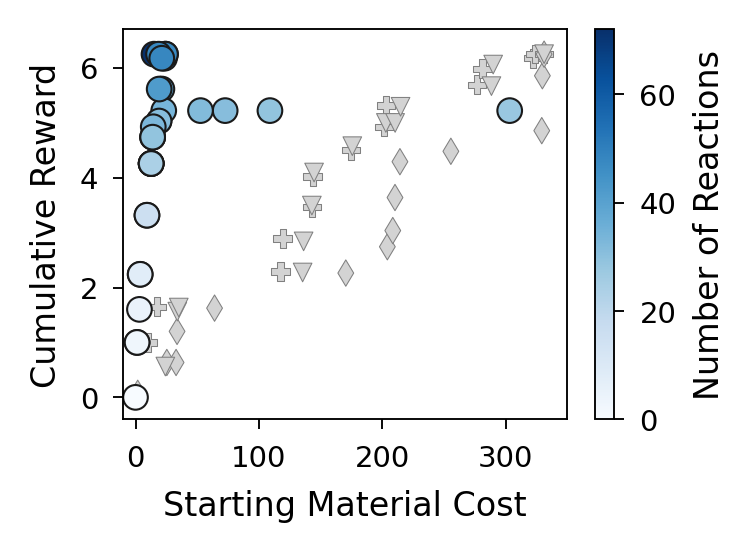

In [98]:
ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Starting Material Cost', 'Cumulative Reward', colorlabel='Number of Reactions', 
    xlim=[-10, 350], size=[1.85, 1.3], ylim=[-0.4, 6.7])

fig.savefig(save_dir/f'pareto_1{ftype}',bbox_inches='tight', dpi=200, transparent=True)

/mnt/home/jfromer/miniforge3/envs/sparrow/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  from ipykernel import kernelapp as app


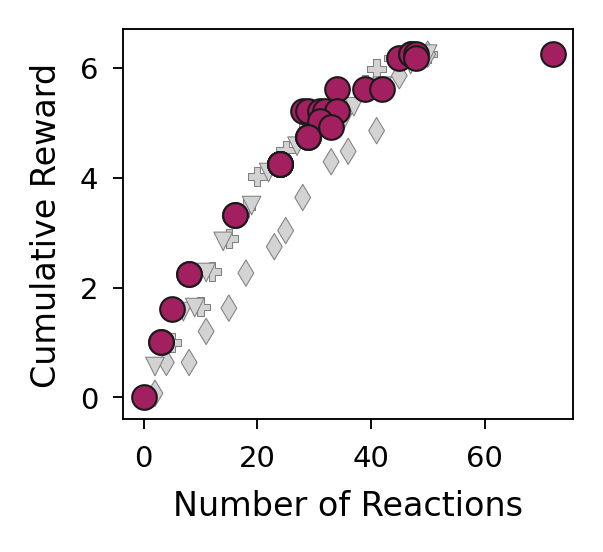

In [99]:
ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Number of Reactions', 'Cumulative Reward',  
    size=[1.5, 1.3], ylim=[-0.4, 6.7], c=2)
fig.savefig(save_dir/f'pareto_2{ftype}',bbox_inches='tight', dpi=200, transparent=True)

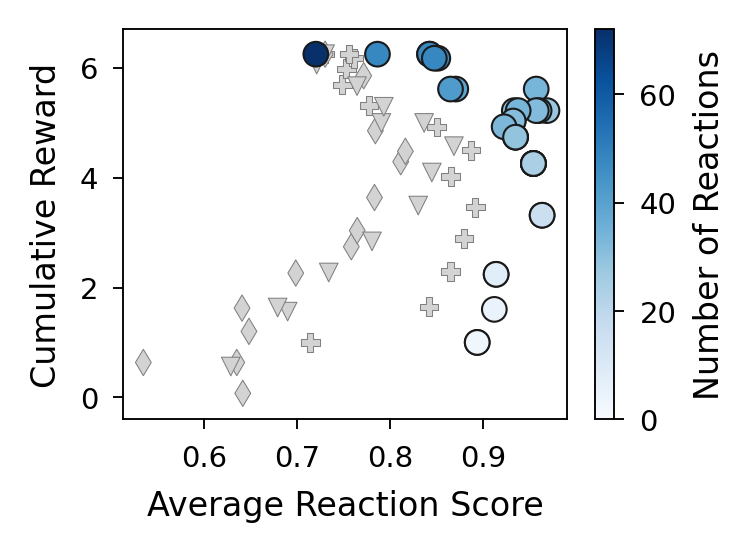

In [100]:
# frames = [df_1, df_3]
# df_all = pd.concat(frames)

# ax, fig = scatter_plot_2d(
#     df_all['Average Reaction Score'], df_all['Total reward'], 
#     xlabel='Average Reaction Score', ylabel='Cumulative Reward', 
#     c=1, size=[1.3, 1.3], baselines=baselines)
# fig.savefig(save_dir/f'pareto_2{ftype}',bbox_inches='tight', dpi=200, transparent=True)

ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Average Reaction Score', 'Cumulative Reward', colorlabel='Number of Reactions', 
    size=[1.85, 1.3], ylim=[-0.4, 6.7])
fig.savefig(save_dir/f'pareto_3{ftype}',bbox_inches='tight', dpi=200, transparent=True)

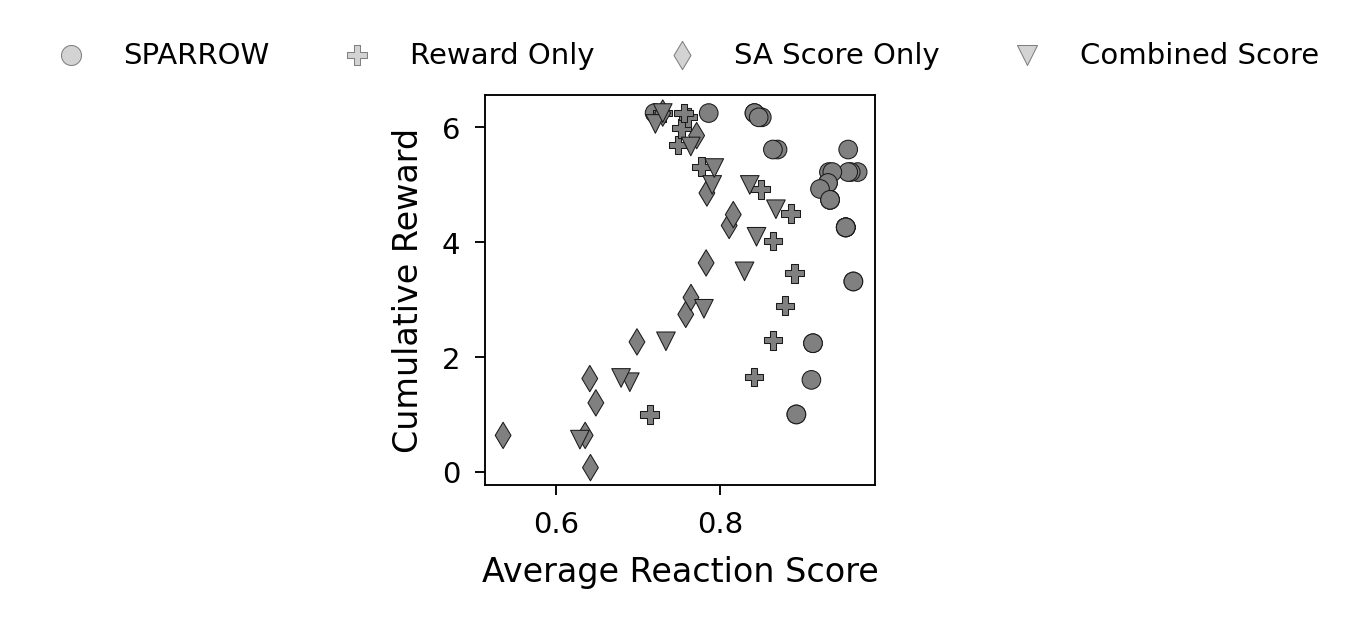

In [101]:
# baseline legend 
markers = {"Reward Only": "P", "SA Score Only": "d", "Combined Score": "v", "SPARROW": 'o'} 
df_all['strategy'] = 'SPARROW'
fig, ax = plt.subplots(1,1)
seaborn.scatterplot(data=df_all, ax=ax, x='Average Reaction Score', y='Cumulative Reward', style='strategy', color="gray", s=20, edgecolor='k', linewidth=0.25, markers=markers)
seaborn.scatterplot(data=baselines, ax=ax, x='Average Reaction Score', y='Cumulative Reward', style='strategy', color="gray", s=20, edgecolor='k', linewidth=0.25, markers=markers)

plot_utils.set_size(1.3, 1.3, ax=ax)
seaborn.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
)
leg = ax.get_legend()

for legg in leg.legendHandles:
    legg.set_color('lightgray')
    legg.set_edgecolor('gray')
    legg.set_linewidth(0.25)

fig.savefig(save_dir/f'legend{ftype}',bbox_inches='tight', dpi=200, transparent=True)


## AMD Case Study (#2)

#### Main plots 


In [114]:
save_dir = Path('figs_amd')
save_dir.mkdir(exist_ok=True)

In [115]:
df = plot_utils.df_from_dir(Path('../results/amd'))
df = df.sort_values('Utility Weight')
plot_utils.df_to_latex(df, save_dir/'latex_table.txt')
df.columns

Index(['Number targets', 'Fraction targets', 'Total reward', 'Possible reward',
       'Number starting materials', 'Cost starting materials',
       'Number reaction steps', 'Average reaction score', 'Utility Weight',
       'Starting Material Weight', 'Reaction Weight'],
      dtype='object')

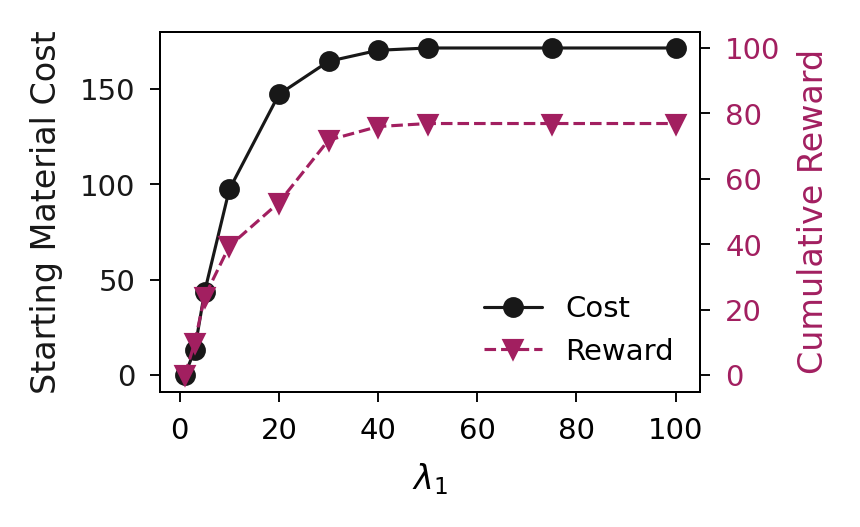

In [118]:
fig = double_line_plot(df['Utility Weight'], df['Cost starting materials'], df['Total reward'],
                 label1='Starting Material Cost', label2='Cumulative Reward', xlabel='$\\lambda_1$',
                 color1='k', color2=colors[2], size=[1.8, 1.2])
fig.savefig(save_dir/f'reward_cost{ftype}',bbox_inches='tight', dpi=200, transparent=True)

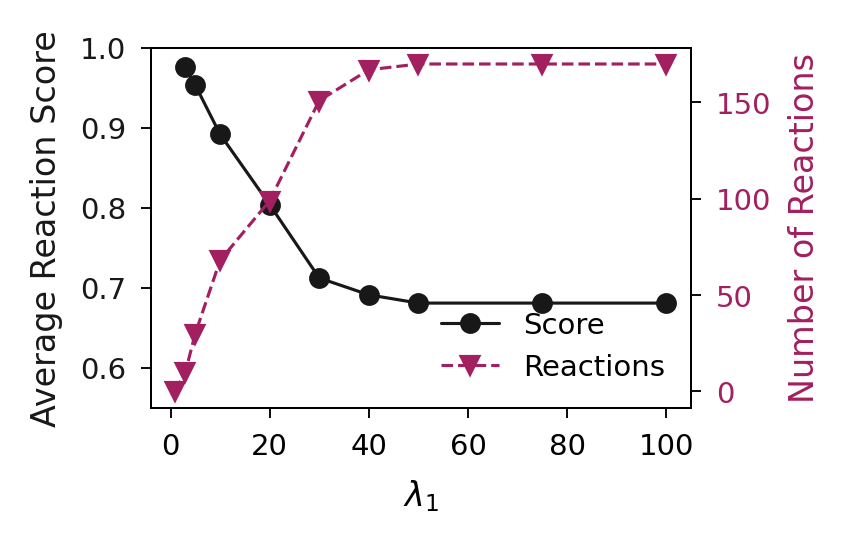

In [105]:
fig = double_line_plot(df['Utility Weight'], df['Average reaction score'], df['Number reaction steps'], 
                 label1='Average Reaction Score', label2='Number of Reactions', xlabel='$\\lambda_1$', size=[1.8,1.2],
                 color1='k', color2=colors[2],)
fig.savefig(save_dir/f'reactions{ftype}',bbox_inches='tight', dpi=200, transparent=True)

In [106]:
# reload(plot_utils)
# vis_results = Path('../results/amd/lam_5_1_1')
# fig1, ax1, fig2, ax2 = plot_utils.graph_vis(
#     tree_path=Path('../examples/amd/trees_w_info.json'),
#     routes_path=Path(vis_results/'routes.json'),
#     cleaned_tar_path=Path(vis_results/'cleaned_tar_dict.csv'),
#     percent_plot=1
#     )
# plot_utils.set_size(6, 3, ax=ax1)
# plot_utils.set_size(6, 3, ax=ax2)
# fig1.savefig(save_dir/f'network_back{ftype}',bbox_inches='tight', dpi=1000, transparent=True)
# fig2.savefig(save_dir/f'network_front{ftype}',bbox_inches='tight', dpi=1000, transparent=True)

#### Pareto fronts with baselines

In [107]:
df_all = df.rename(columns={
    'Total reward': 'Cumulative Reward', 
    'Number reaction steps': 'Number of Reactions', 
    'Cost starting materials': 'Starting Material Cost',
    'Average reaction score': 'Average Reaction Score'})
baselines = pd.read_csv('../examples/amd/baselines/baseline_curves.csv')
baselines = baselines.loc[baselines.N>0]
baselines = baselines.rename(columns={
    'Cost': 'Starting Material Cost', 
    'Reward': 'Cumulative Reward', 
    'N_rxns': 'Number of Reactions',
    'Average reaction score': 'Average Reaction Score'})
plot_utils.df_to_latex_baselines(baselines, save_dir/'latex_table_baselines.txt')



,strategy,N,Cumulative Reward,Starting Material Cost,Number of Reactions,Average Reaction Score
0,Reward Only,1,1.0,3.0,4,0.69
1,Reward Only,11,11.0,531.5,40,0.81
2,Reward Only,21,21.0,575.8,65,0.76
3,Reward Only,31,30.5,883.6,97,0.68
4,Reward Only,41,39.7,1046.1,130,0.70
5,Reward Only,51,48.8,1140.9,158,0.65
6,Reward Only,61,57.2,1164.4,178,0.65
7,Reward Only,71,64.5,1375.5,195,0.62
8,Reward Only,81,70.4,1404.9,205,0.62
9,Reward Only,91,74.8,1435.9,213,0.62


/mnt/home/jfromer/miniforge3/envs/sparrow/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  from ipykernel import kernelapp as app


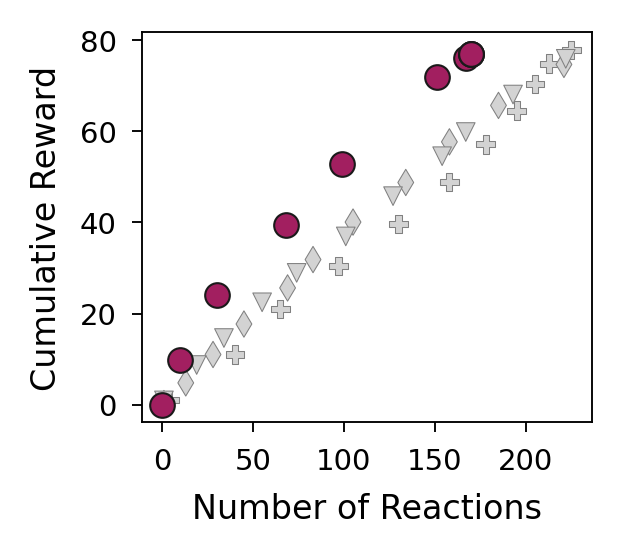

In [108]:
ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Number of Reactions', 'Cumulative Reward',
    size=[1.5, 1.3], c=2)
fig.savefig(save_dir/f'pareto_1{ftype}',bbox_inches='tight', dpi=200, transparent=True)

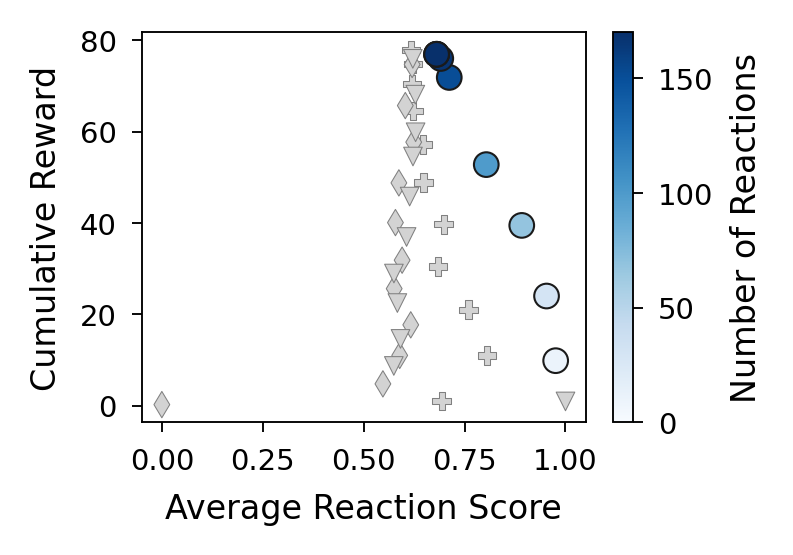

In [109]:
ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Average Reaction Score', 'Cumulative Reward', colorlabel='Number of Reactions', 
    size=[1.85, 1.3])
fig.savefig(save_dir/f'pareto_2{ftype}',bbox_inches='tight', dpi=200, transparent=True)

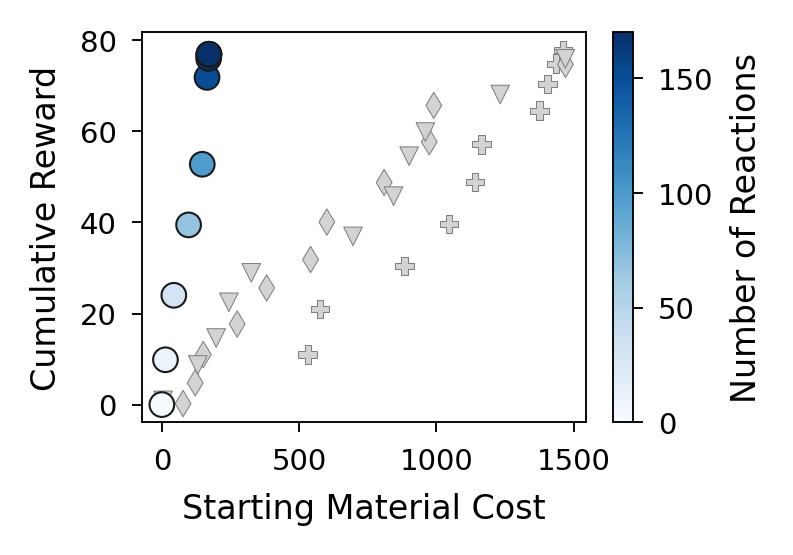

In [110]:
ax, fig = scatter_plot_2d_seaborn(
    df_all, baselines, 
    'Starting Material Cost', 'Cumulative Reward', colorlabel='Number of Reactions', 
    ylim=None, size=[1.85, 1.3])
fig.savefig(save_dir/f'pareto_3{ftype}',bbox_inches='tight', dpi=200, transparent=True)

## Button Case Study

In [111]:
df = plot_utils.df_from_dir(Path('../results/button_alectinib'))
df


""
